# AIR QUALITY INDEX PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv" , encoding = 'ISO-8859-1')
df.head()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\2775574804.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv" , encoding = 'ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# DATA CLEANING

In [3]:
df1 = df[['state','so2','no2','rspm','spm']]
df1.head()

,state,so2,no2,rspm,spm
0,Andhra Pradesh,4.8,17.4,NaN,NaN
1,Andhra Pradesh,3.1,7.0,NaN,NaN
2,Andhra Pradesh,6.2,28.5,NaN,NaN
3,Andhra Pradesh,6.3,14.7,NaN,NaN
4,Andhra Pradesh,4.7,7.5,NaN,NaN


In [4]:
df1.isnull().sum()

state         0
so2       34646
no2       16233
rspm      40222
spm      237387
dtype: int64

In [5]:
df1['rspm'].mean()

108.83278418538409

In [6]:
df1['so2'].mean()

10.829414322672587

In [7]:
df1['no2'].mean()

25.80962289781126

In [8]:
df1['rspm'] = df1['rspm'].fillna(0)
df1['spm'] = df1['spm'].fillna(0)
df1['so2'] = df1['so2'].fillna(0)
df1['no2'] = df1['no2'].fillna(0)
df1.isnull().sum()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\807594747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rspm'] = df1['rspm'].fillna(0)
C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\807594747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['spm'] = df1['spm'].fillna(0)
C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\807594747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

state    0
so2      0
no2      0
rspm     0
spm      0
dtype: int64

In [9]:
df1.describe()

,so2,no2,rspm,spm
count,435742.000000,435742.000000,435742.000000,435742.000000
mean,9.968364,24.848119,98.786766,100.503296
std,11.116635,18.801635,77.979702,150.074247
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,47.000000,0.000000
50%,7.183333,21.000000,83.000000,0.000000
75%,13.000000,32.000000,135.000000,172.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [10]:
q1 = df1['so2'].quantile(0.25)
q3 = df1['so2'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5 * IQR
up = q3 + 1.5 * IQR
df2 = df1[(df1['so2'] >= low) & (df1['so2'] <=up)]
df2.describe()

,so2,no2,rspm,spm
count,412369.000000,412369.000000,412369.000000,412369.000000
mean,8.203386,23.760914,98.208662,97.430700
std,6.095689,17.448678,76.869512,147.176717
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,47.000000,0.000000
50%,7.000000,20.500000,82.000000,0.000000
75%,12.000000,30.800000,133.000000,167.000000
max,26.500000,876.000000,6307.033333,3380.000000


In [11]:
q1 = df1['no2'].quantile(0.25)
q3 = df1['no2'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5 * IQR
up = q3 + 1.5 * IQR
df2 = df1[(df1['no2'] >= low) & (df1['no2'] <=up)]
df2.describe()

,so2,no2,rspm,spm
count,417626.000000,417626.000000,417626.000000,417626.000000
mean,9.555389,22.267814,96.320281,96.794705
std,10.271176,12.910167,75.126048,145.169686
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,46.000000,0.000000
50%,7.000000,20.500000,81.000000,0.000000
75%,13.000000,30.000000,131.000000,167.000000
max,909.000000,60.500000,6307.033333,2610.000000


In [12]:
q1 = df1['rspm'].quantile(0.25)
q3 = df1['rspm'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5 * IQR
up = q3 + 1.5 * IQR
df2 = df1[(df1['rspm'] >= low) & (df1['rspm'] <=up)]
df2.describe()

,so2,no2,rspm,spm
count,421193.000000,421193.000000,421193.000000,421193.000000
mean,9.888933,24.240233,90.391434,96.072509
std,11.115270,18.034538,62.197680,139.284483
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,46.000000,0.000000
50%,7.000000,21.000000,80.000000,0.000000
75%,13.000000,31.000000,128.000000,169.000000
max,909.000000,876.000000,267.000000,3380.000000


In [13]:
q1 = df1['spm'].quantile(0.25)
q3 = df1['spm'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5 * IQR
up = q3 + 1.5 * IQR
df2 = df1[(df1['spm'] >= low) & (df1['spm'] <=up)]
df2.describe()

,so2,no2,rspm,spm
count,417050.000000,417050.000000,417050.000000,417050.000000
mean,9.816746,24.252395,94.369957,80.211290
std,10.902489,18.159286,71.918294,114.354729
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,47.000000,0.000000
50%,7.000000,21.000000,81.000000,0.000000
75%,13.000000,31.000000,129.000000,151.000000
max,909.000000,876.000000,6307.033333,430.000000


# DATA VISUALIZATION

In [14]:
df2.head()

,state,so2,no2,rspm,spm
0,Andhra Pradesh,4.8,17.4,0.0,0.0
1,Andhra Pradesh,3.1,7.0,0.0,0.0
2,Andhra Pradesh,6.2,28.5,0.0,0.0
3,Andhra Pradesh,6.3,14.7,0.0,0.0
4,Andhra Pradesh,4.7,7.5,0.0,0.0


[]

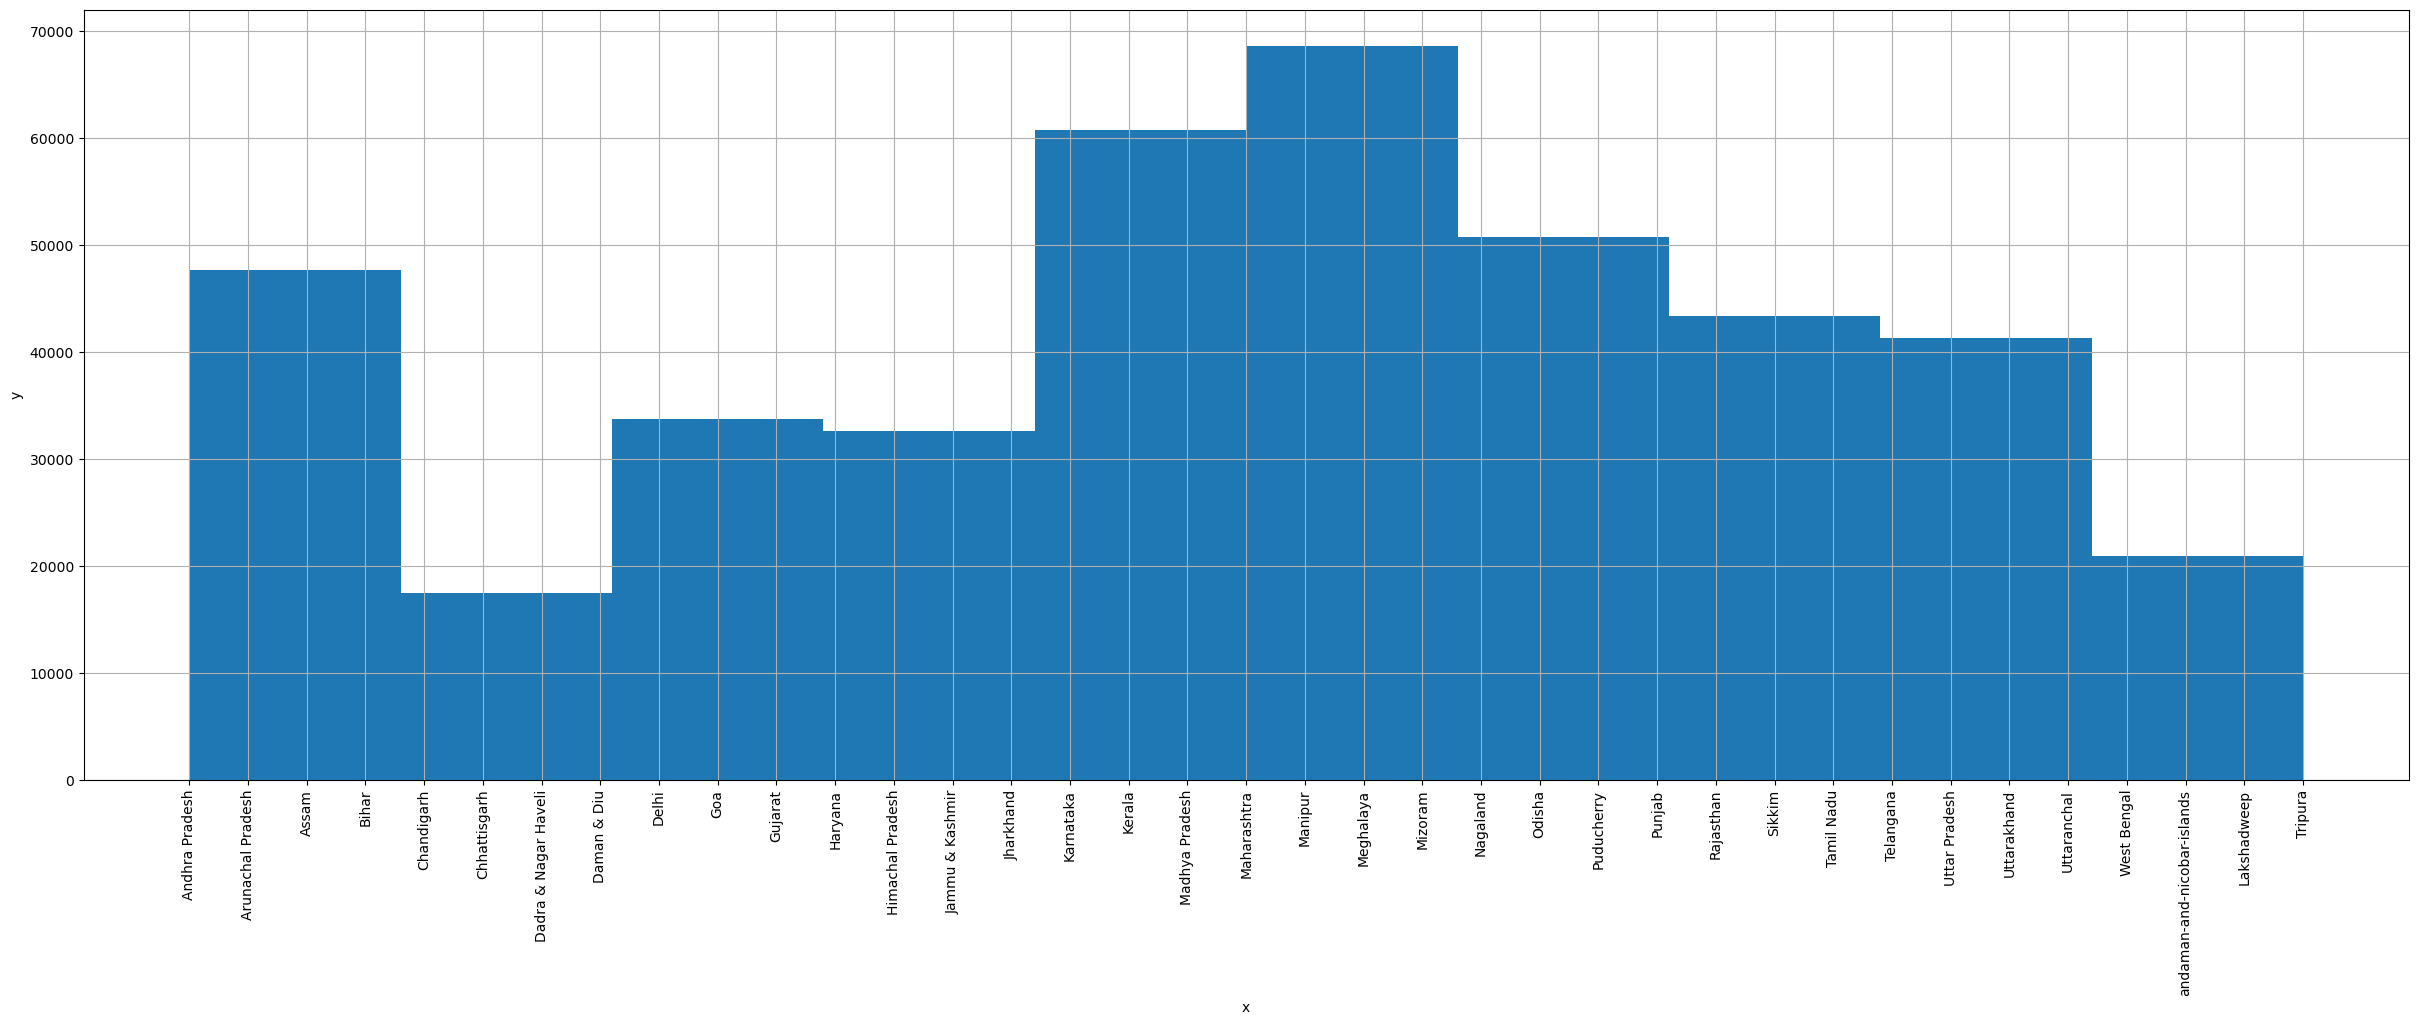

In [15]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
df2.state.hist()
plt.xlabel('x')
plt.ylabel('y')
plt.plot()

Text(0, 0.5, 'so2')

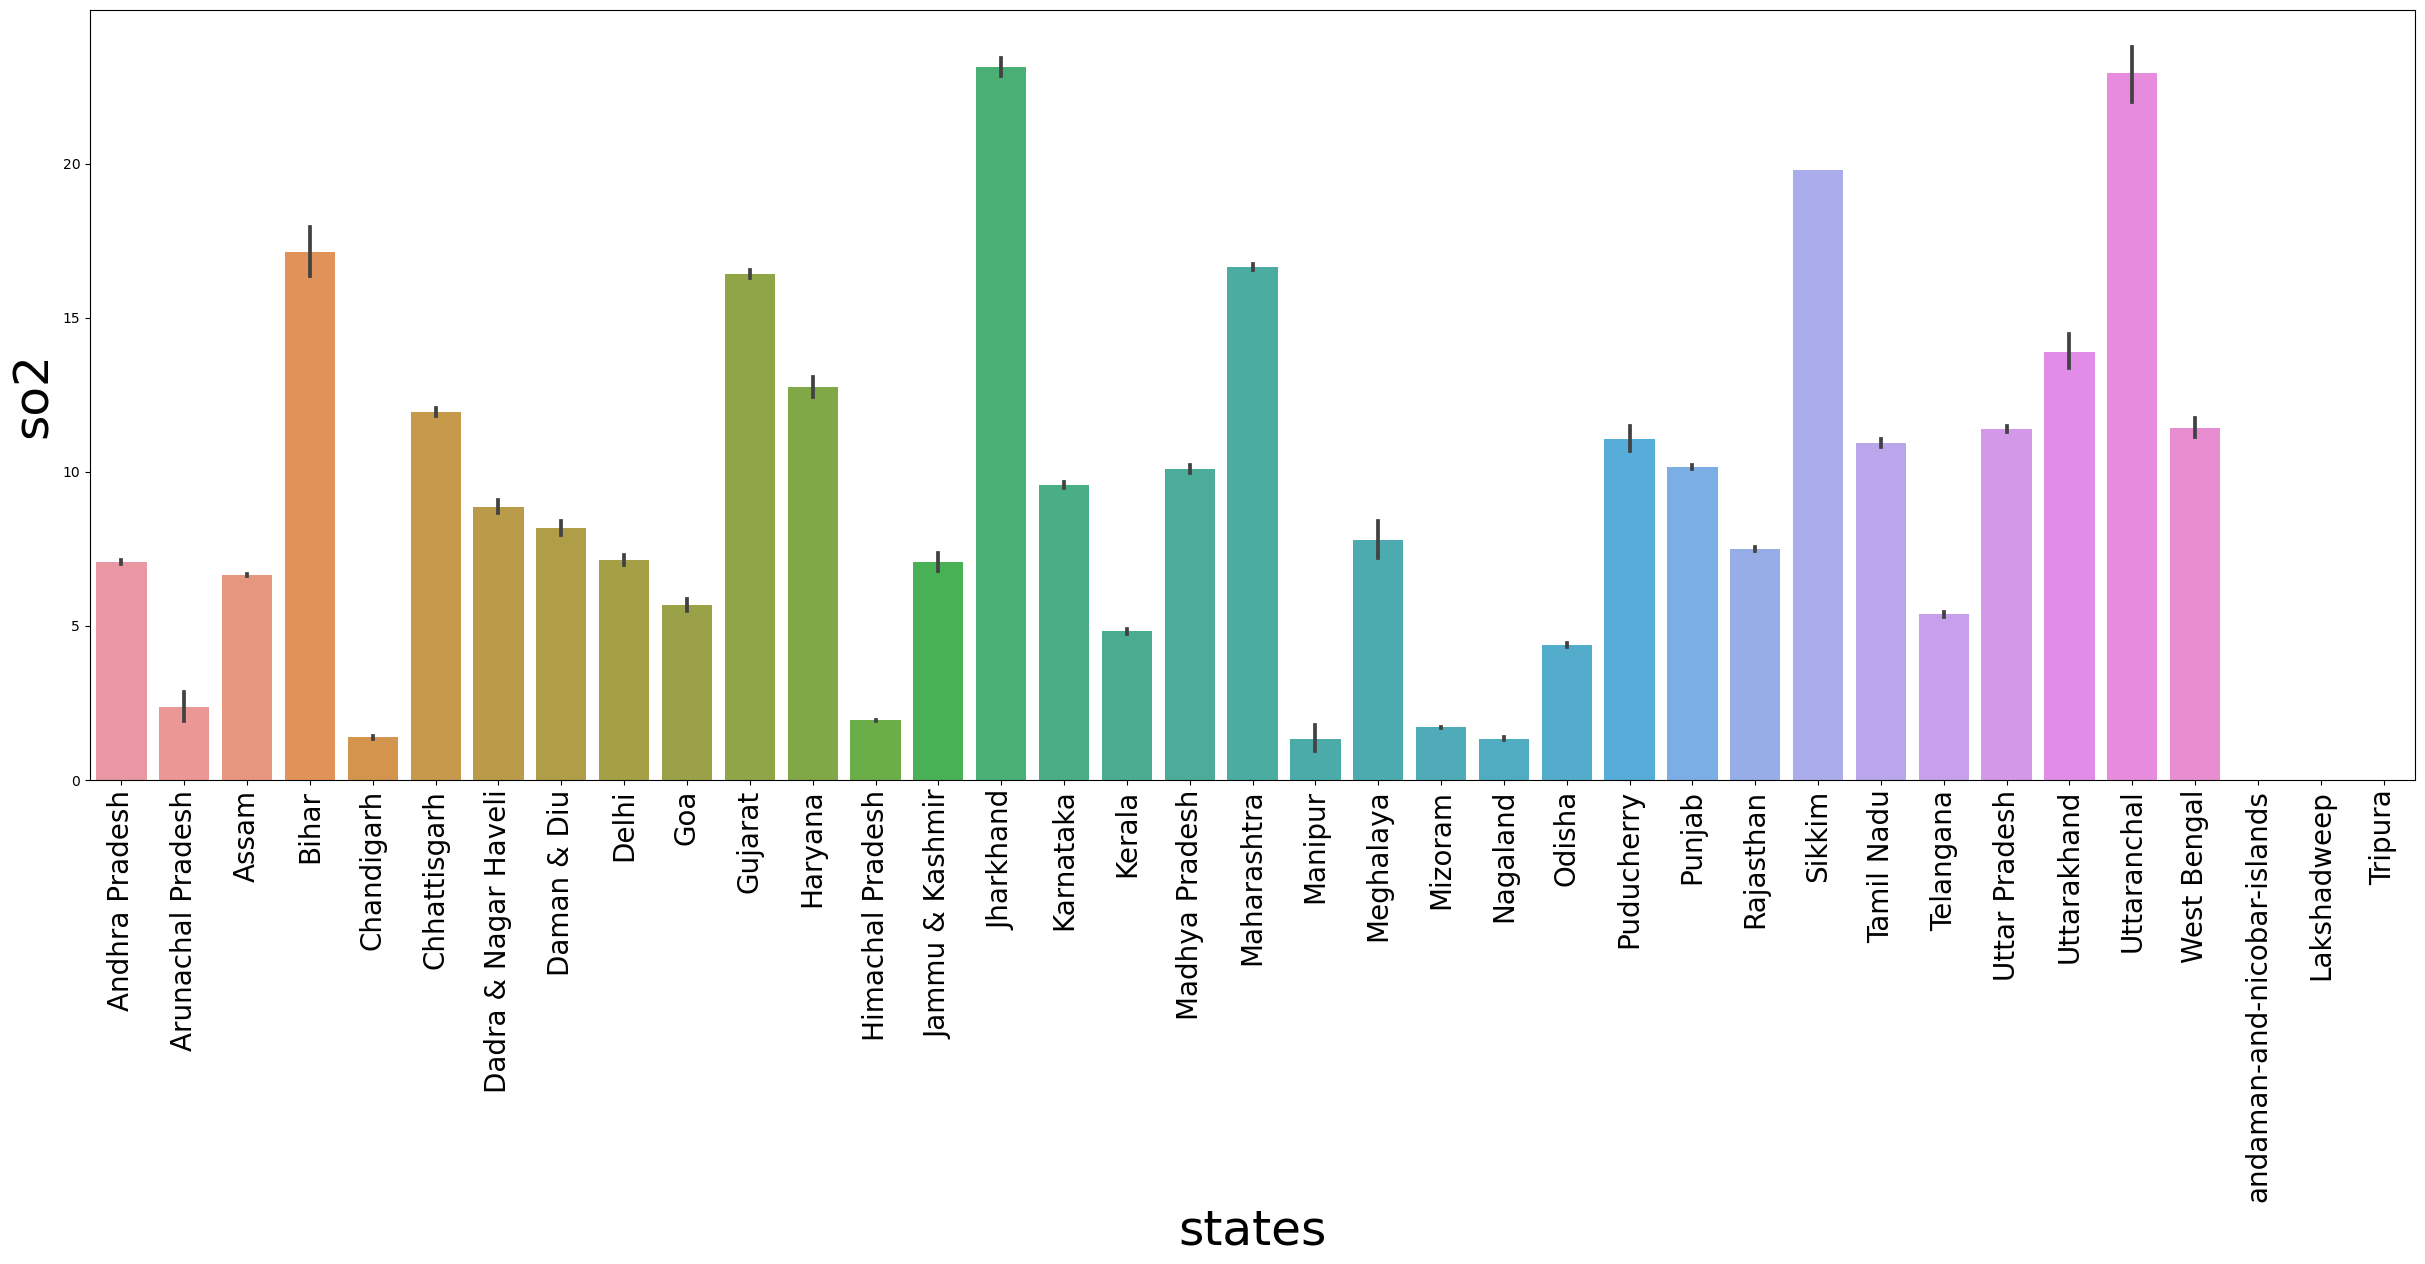

In [16]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'so2', data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('so2',fontsize = 35)

Text(0, 0.5, 'no2')

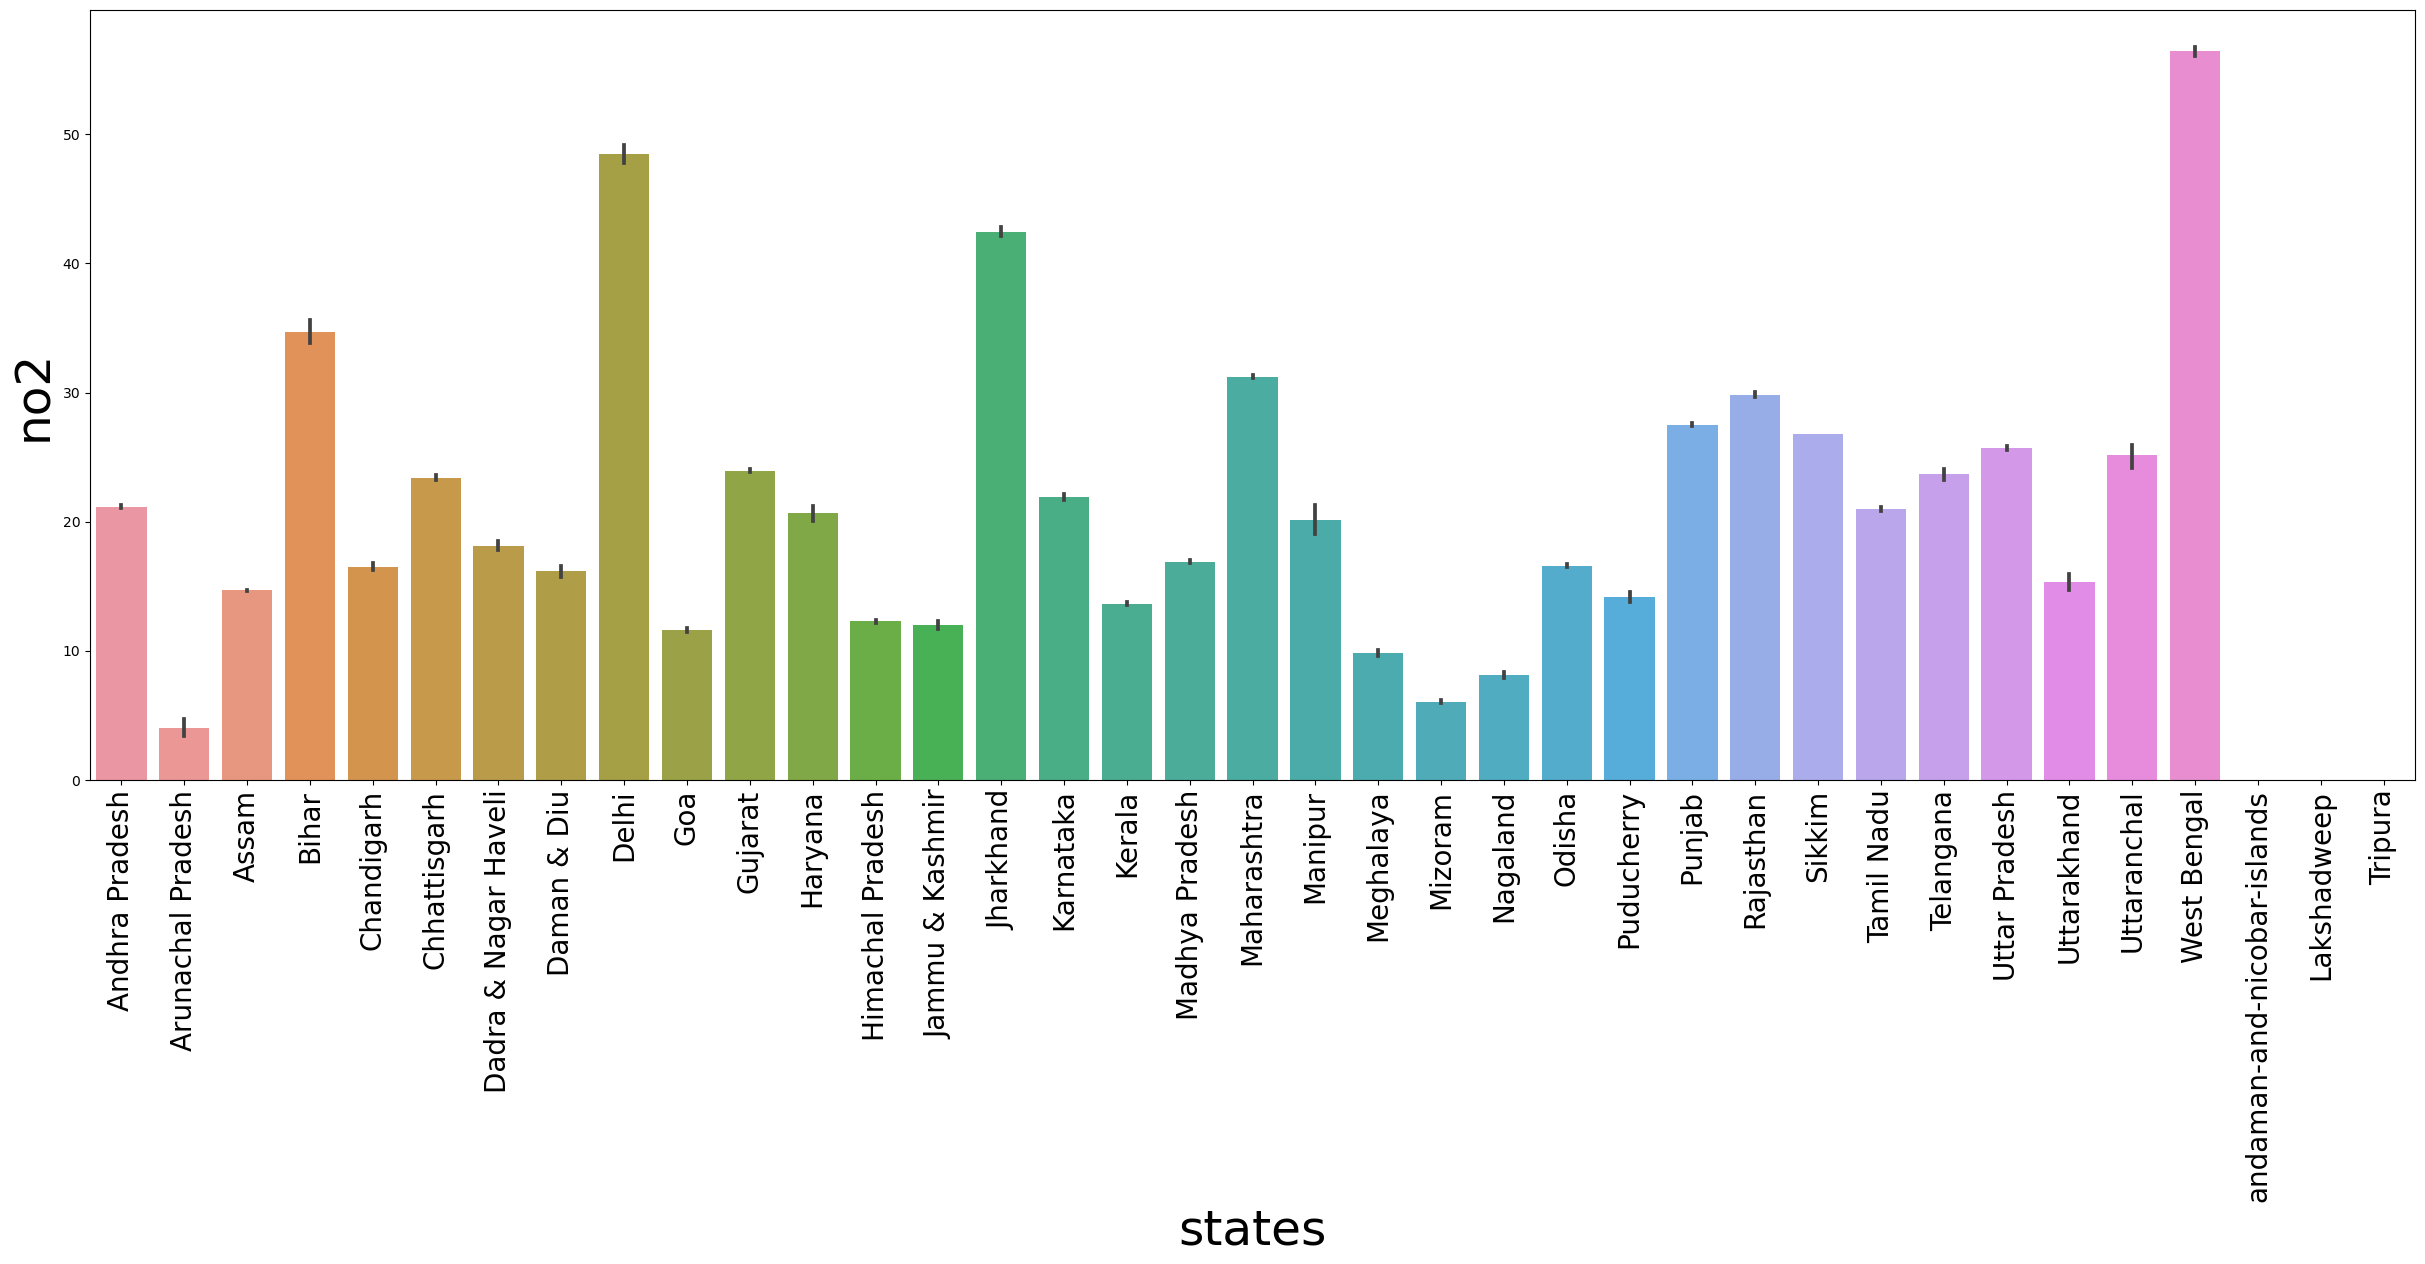

In [17]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'no2', data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('no2',fontsize = 35)

Text(0, 0.5, 'rspm')

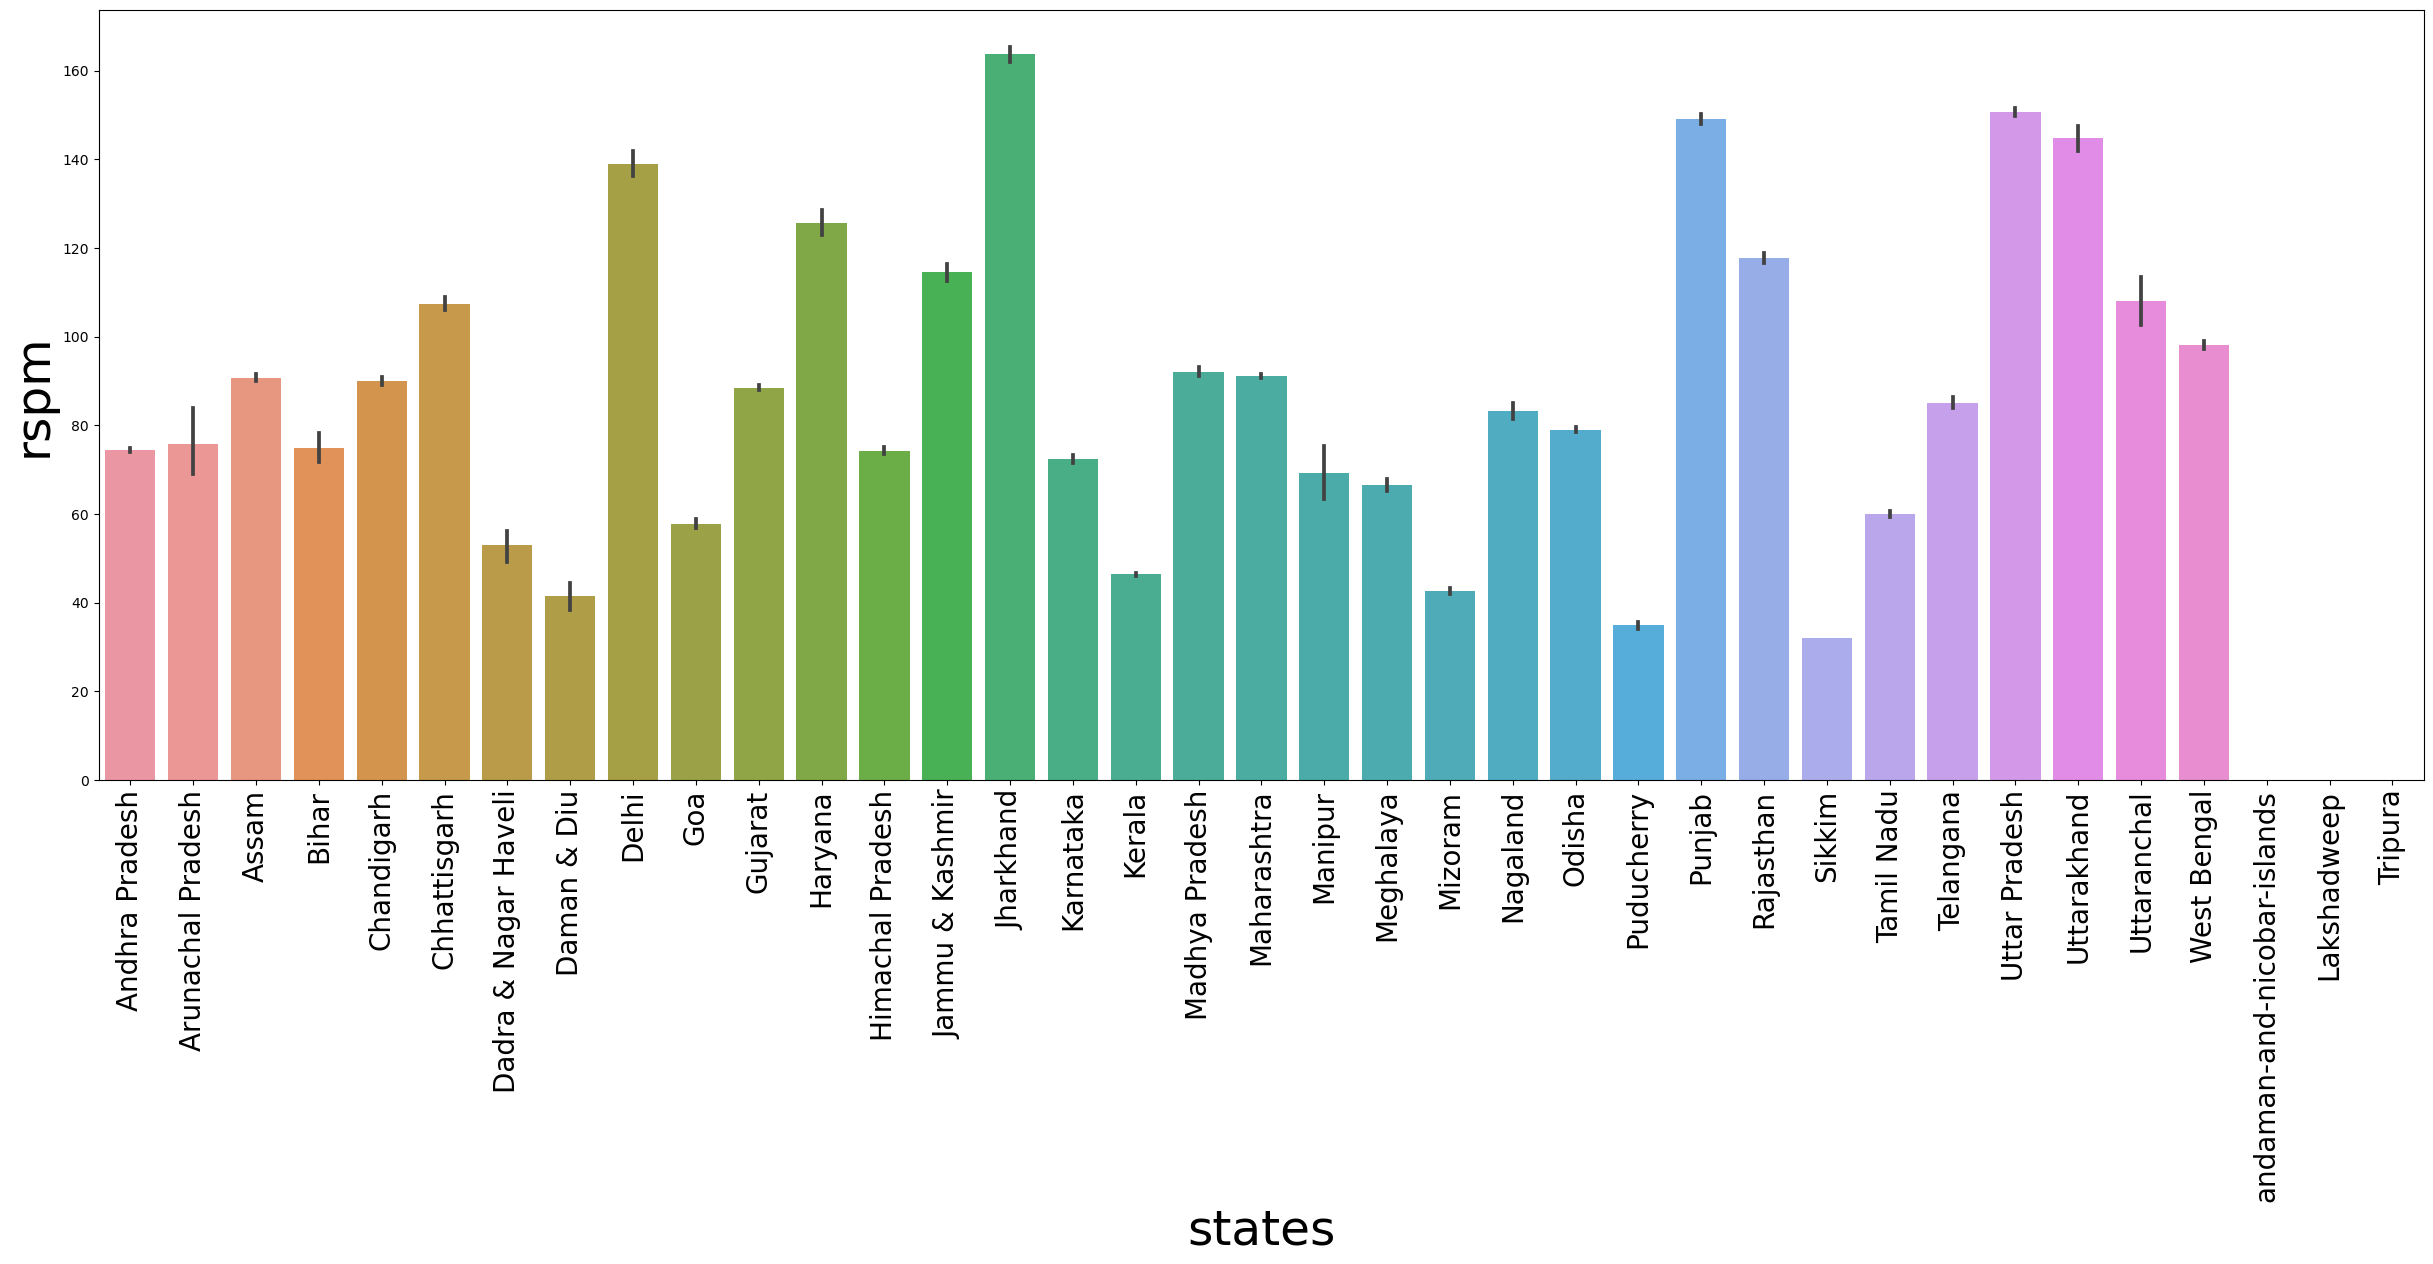

In [18]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'rspm', data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('rspm',fontsize = 35)

Text(0, 0.5, 'spm')

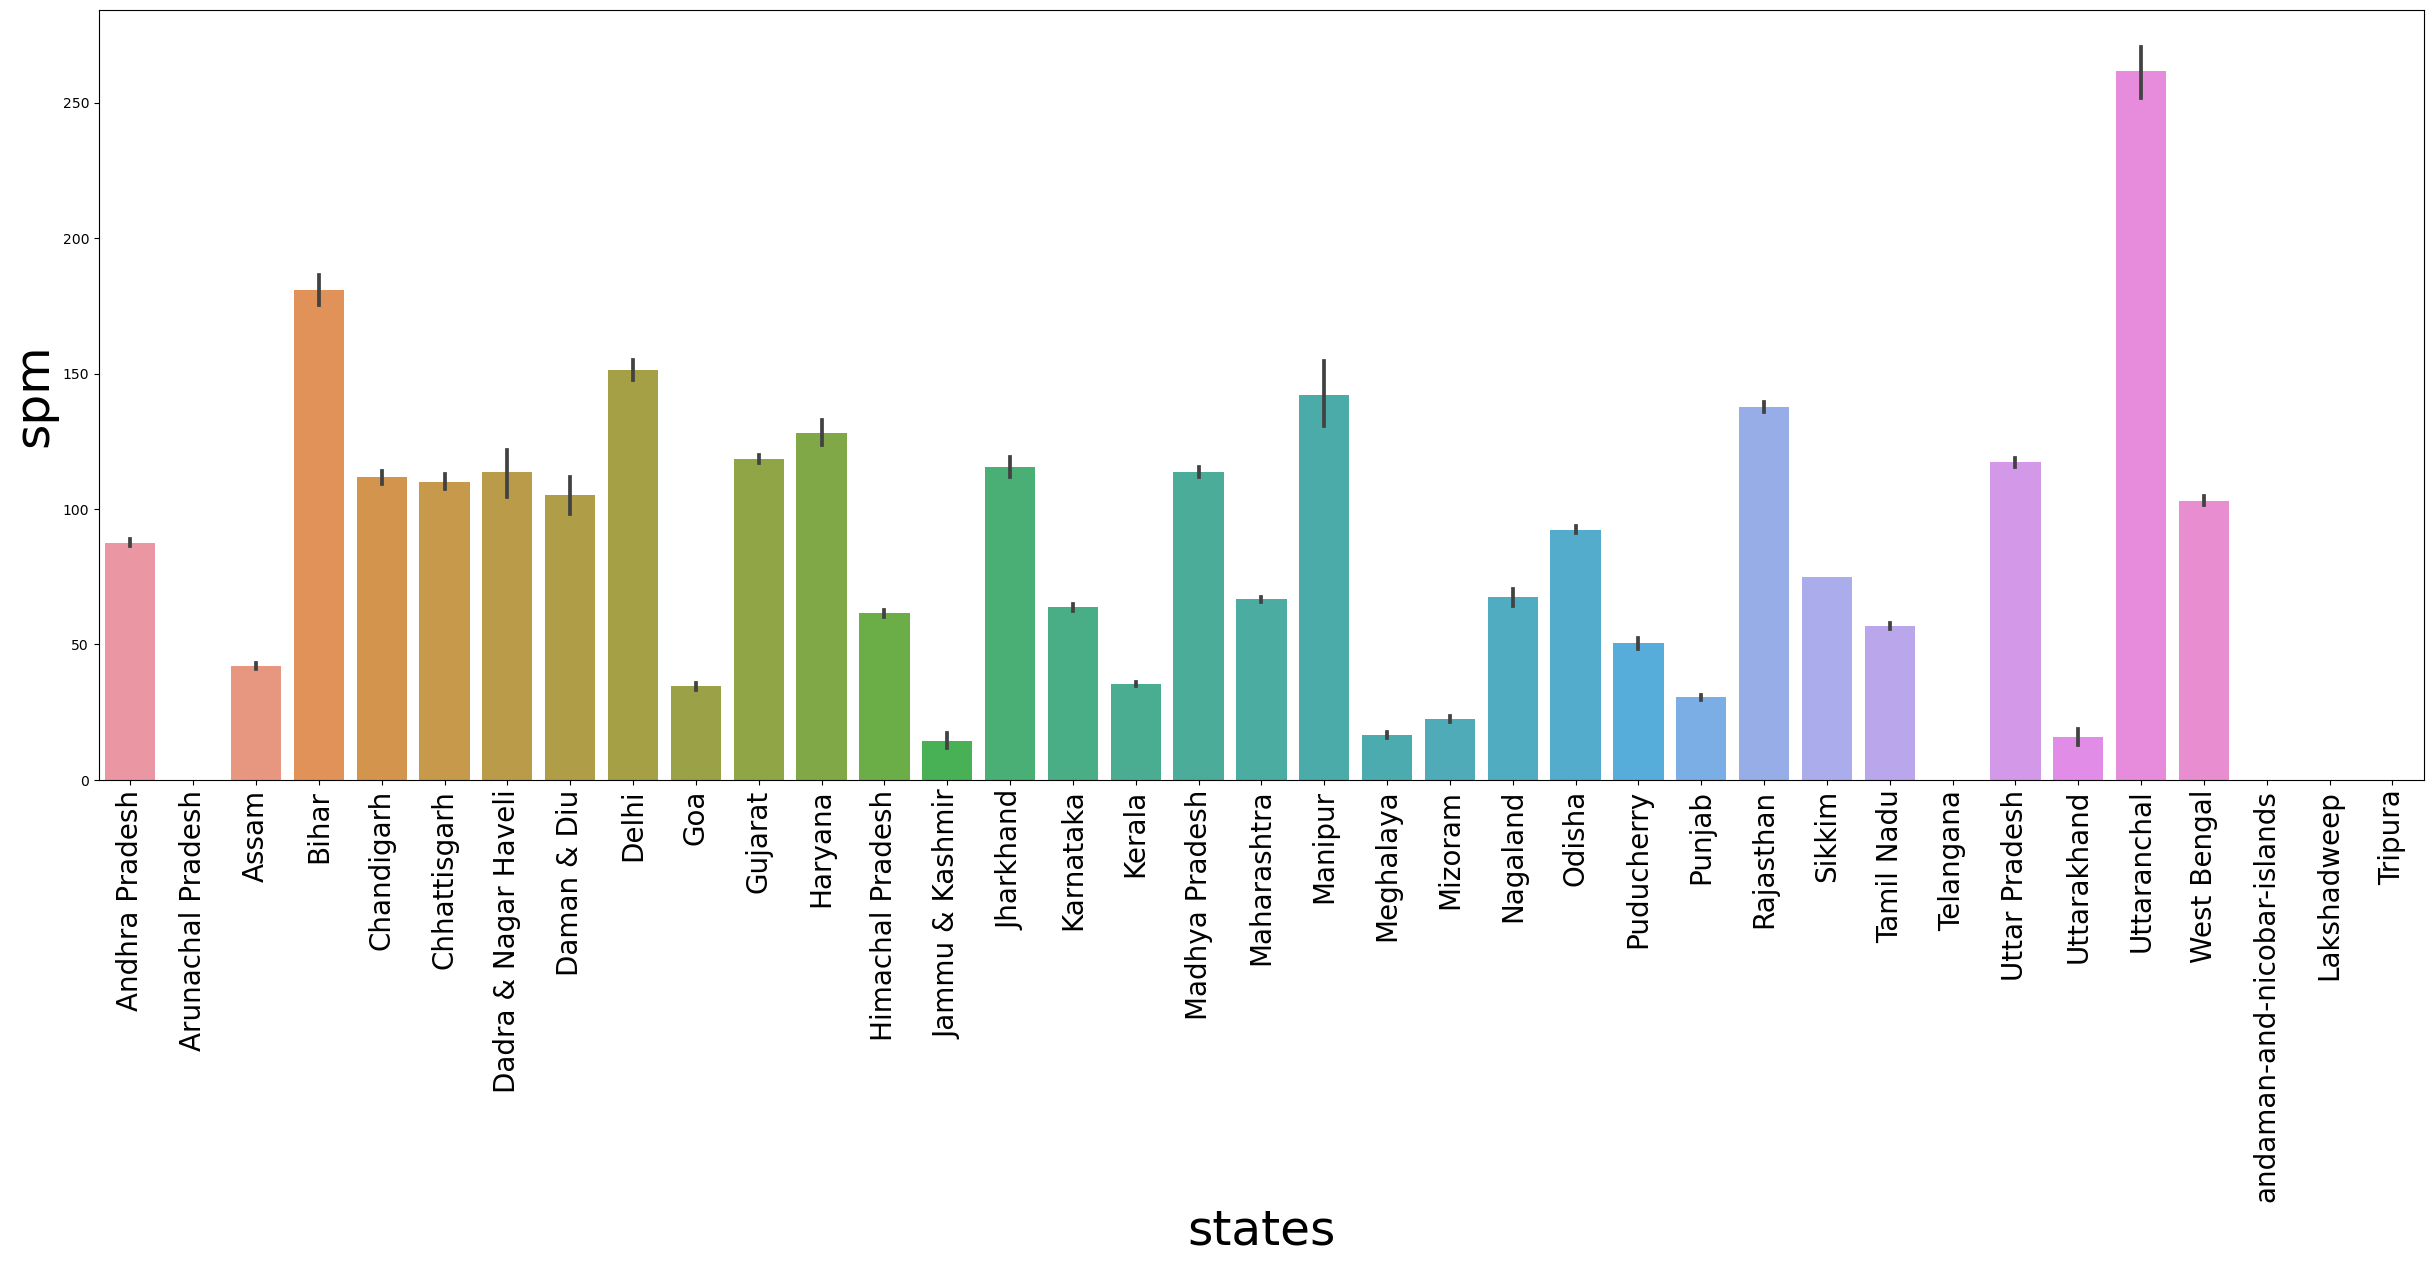

In [19]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'spm', data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('spm',fontsize = 35)

In [20]:
plt.rcParams['figure.figsize']=(30,10)

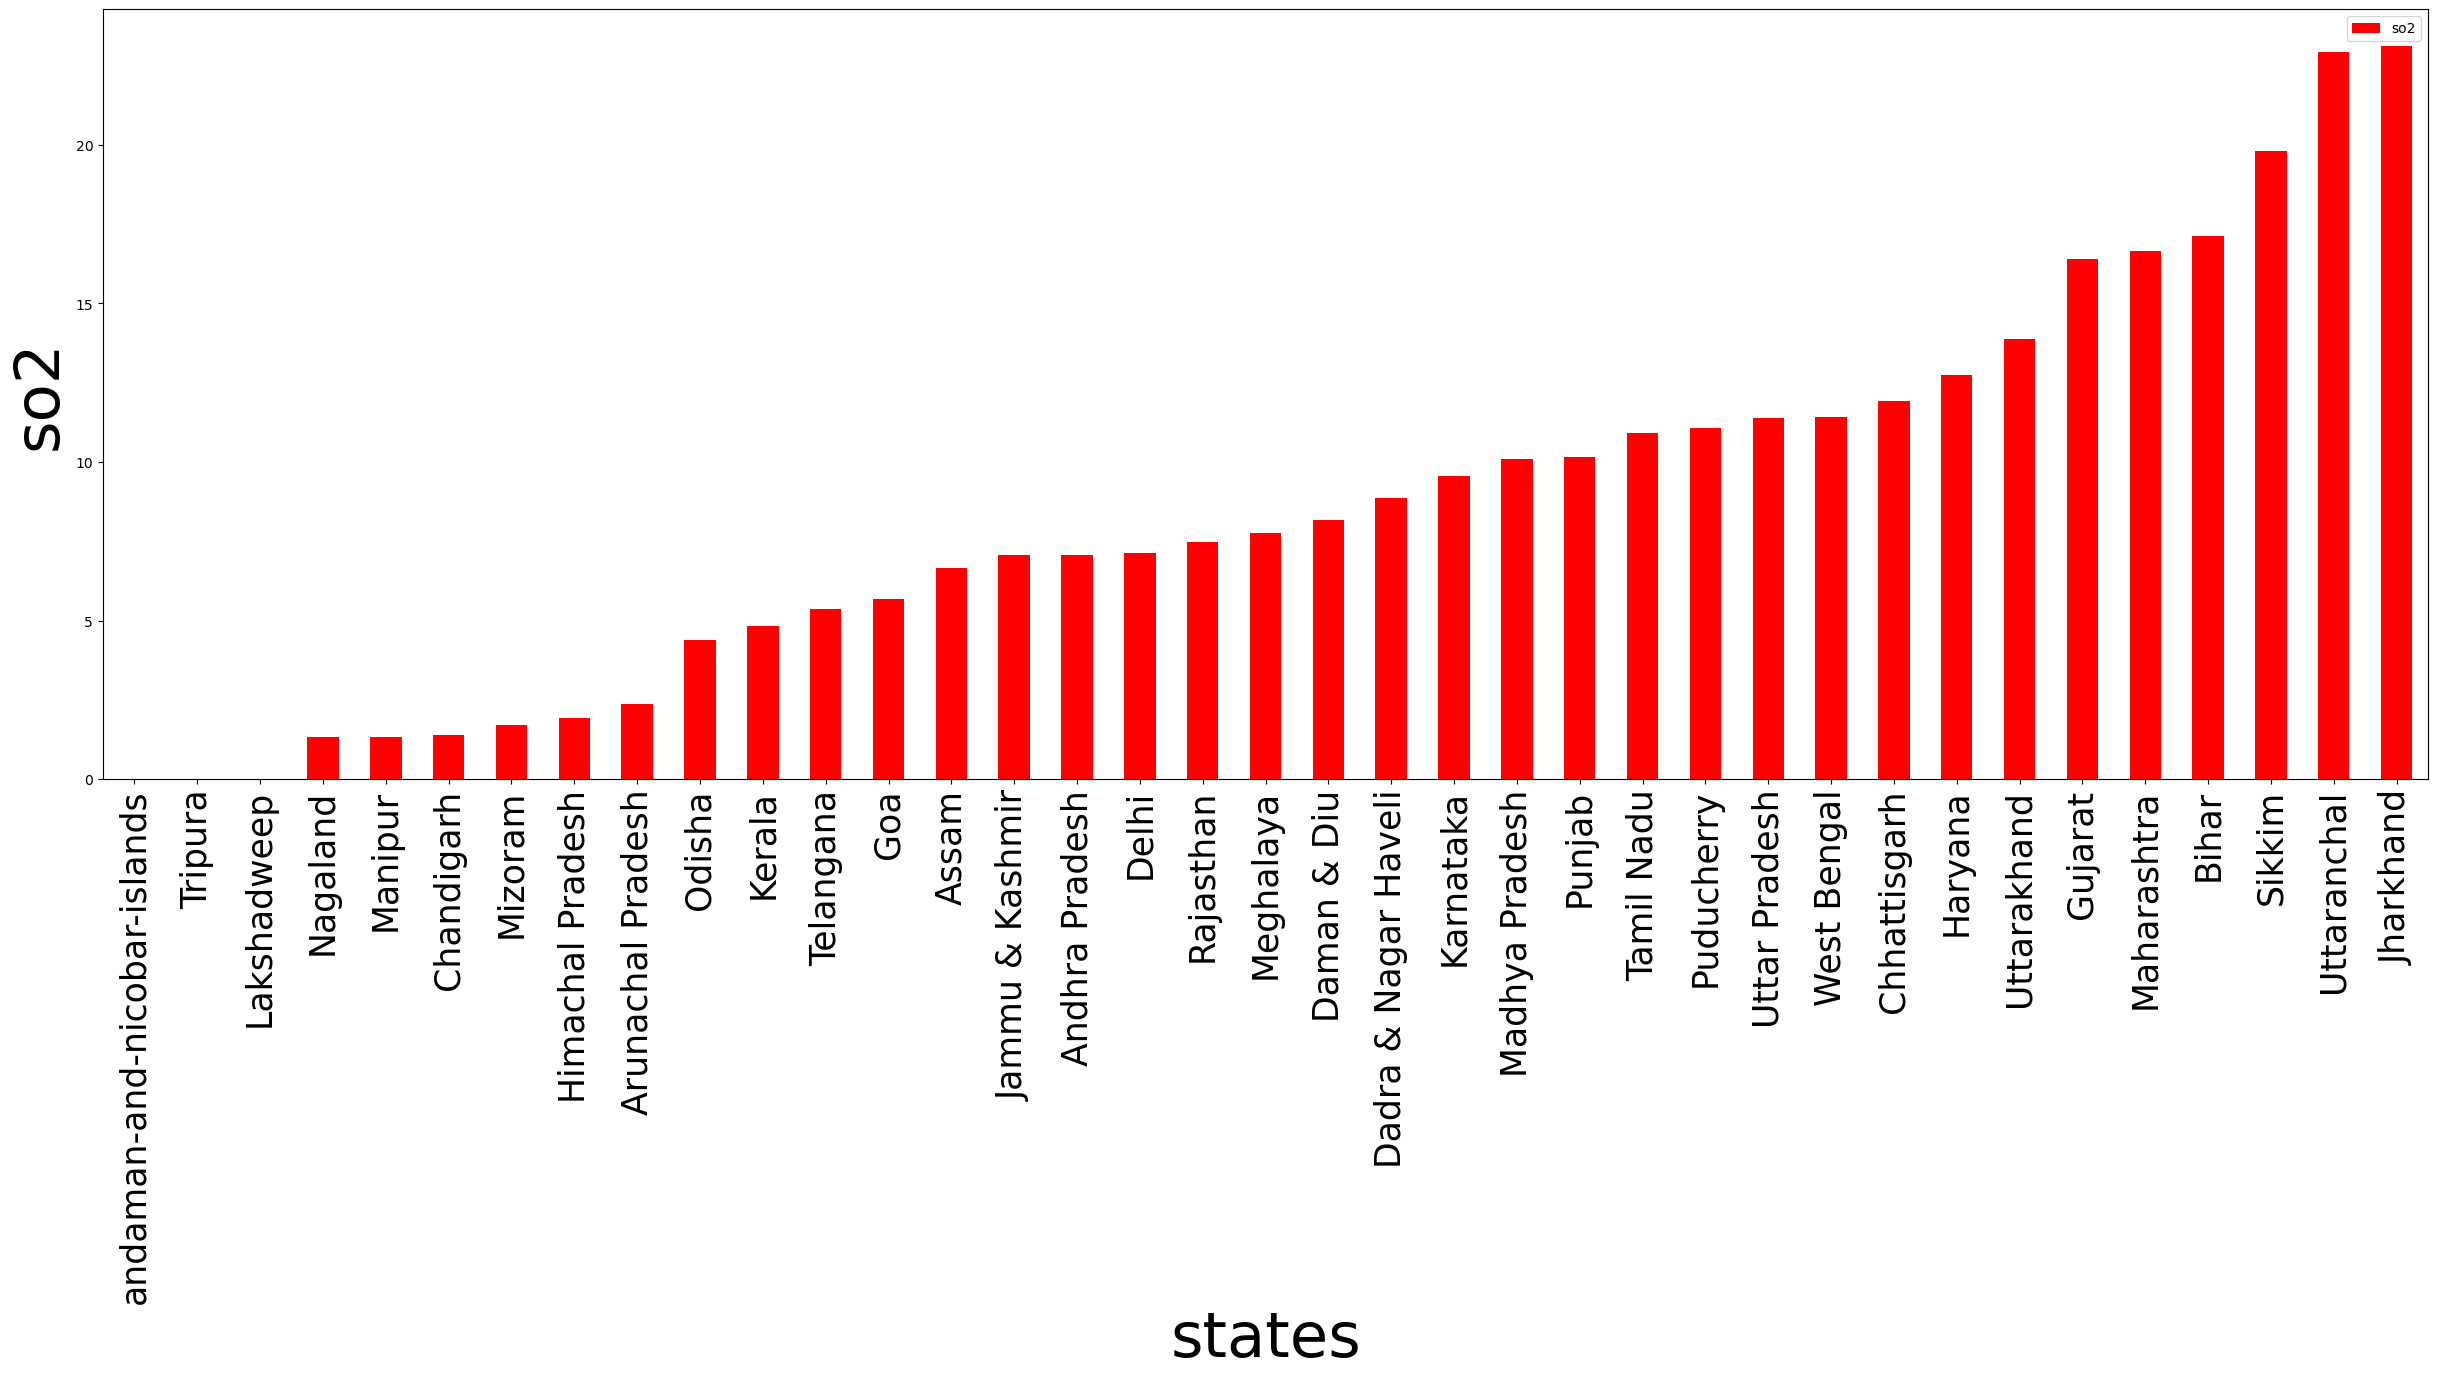

In [21]:
df2[['so2','state']].groupby('state').mean().sort_values(by = 'so2').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('so2',fontsize = 45)
plt.show()

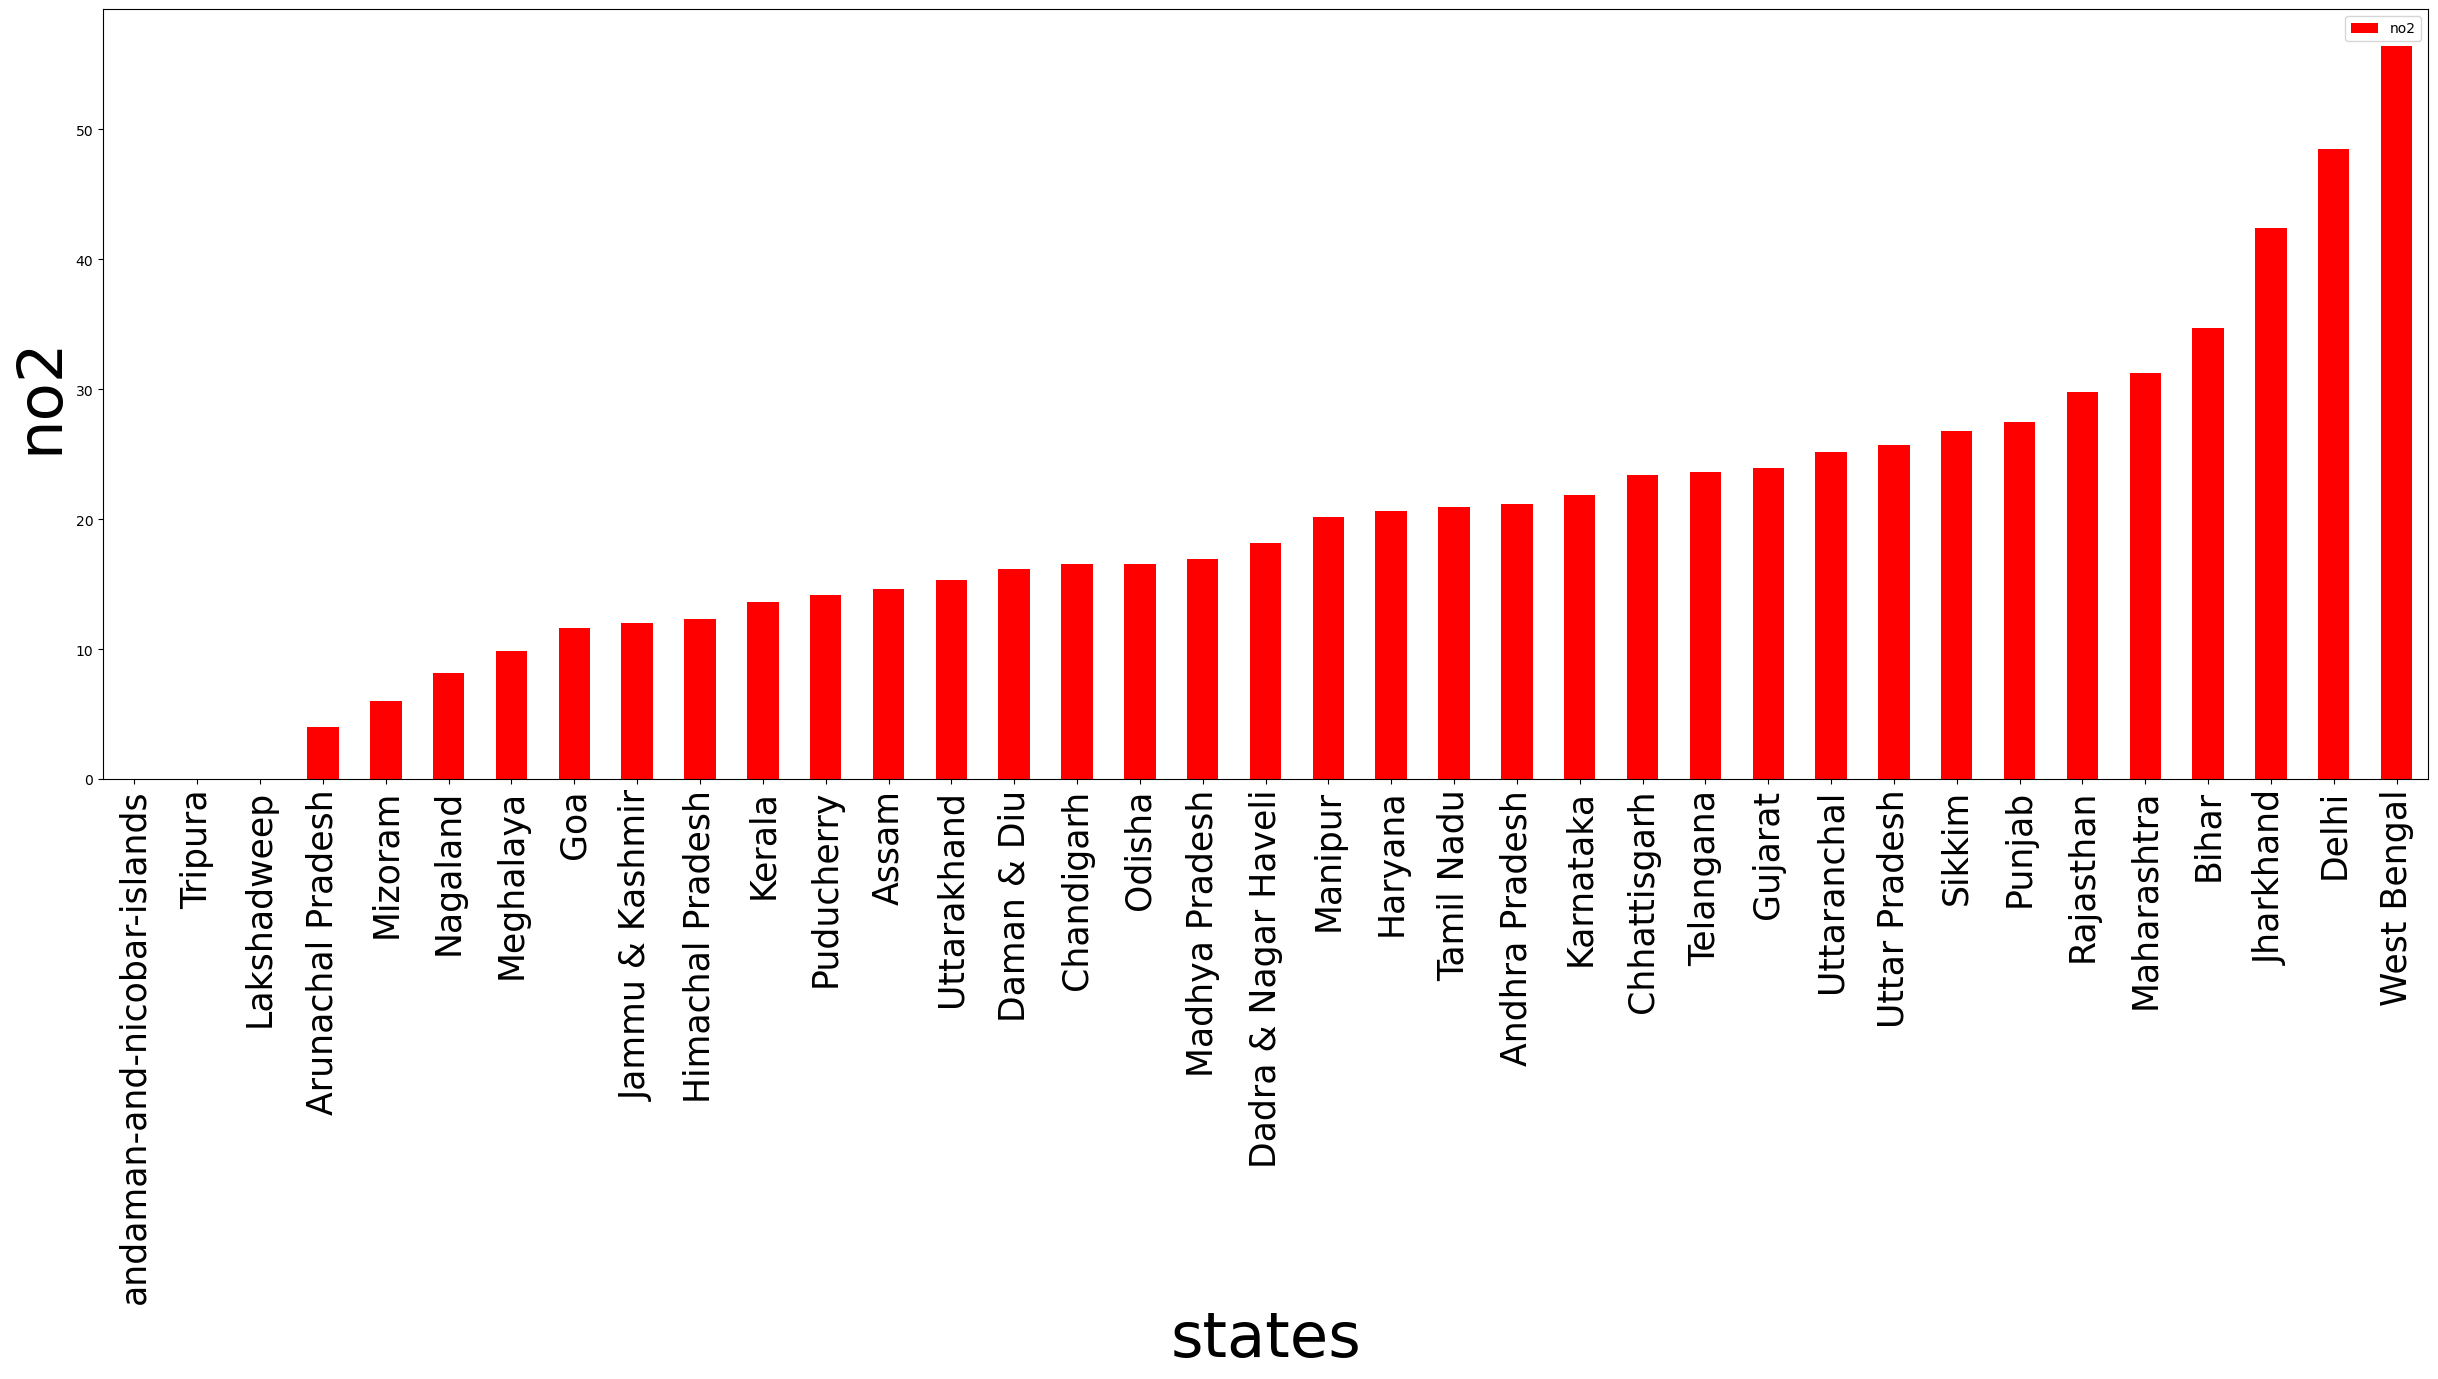

In [22]:
df2[['no2','state']].groupby('state').mean().sort_values(by = 'no2').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('no2',fontsize = 45)
plt.show()

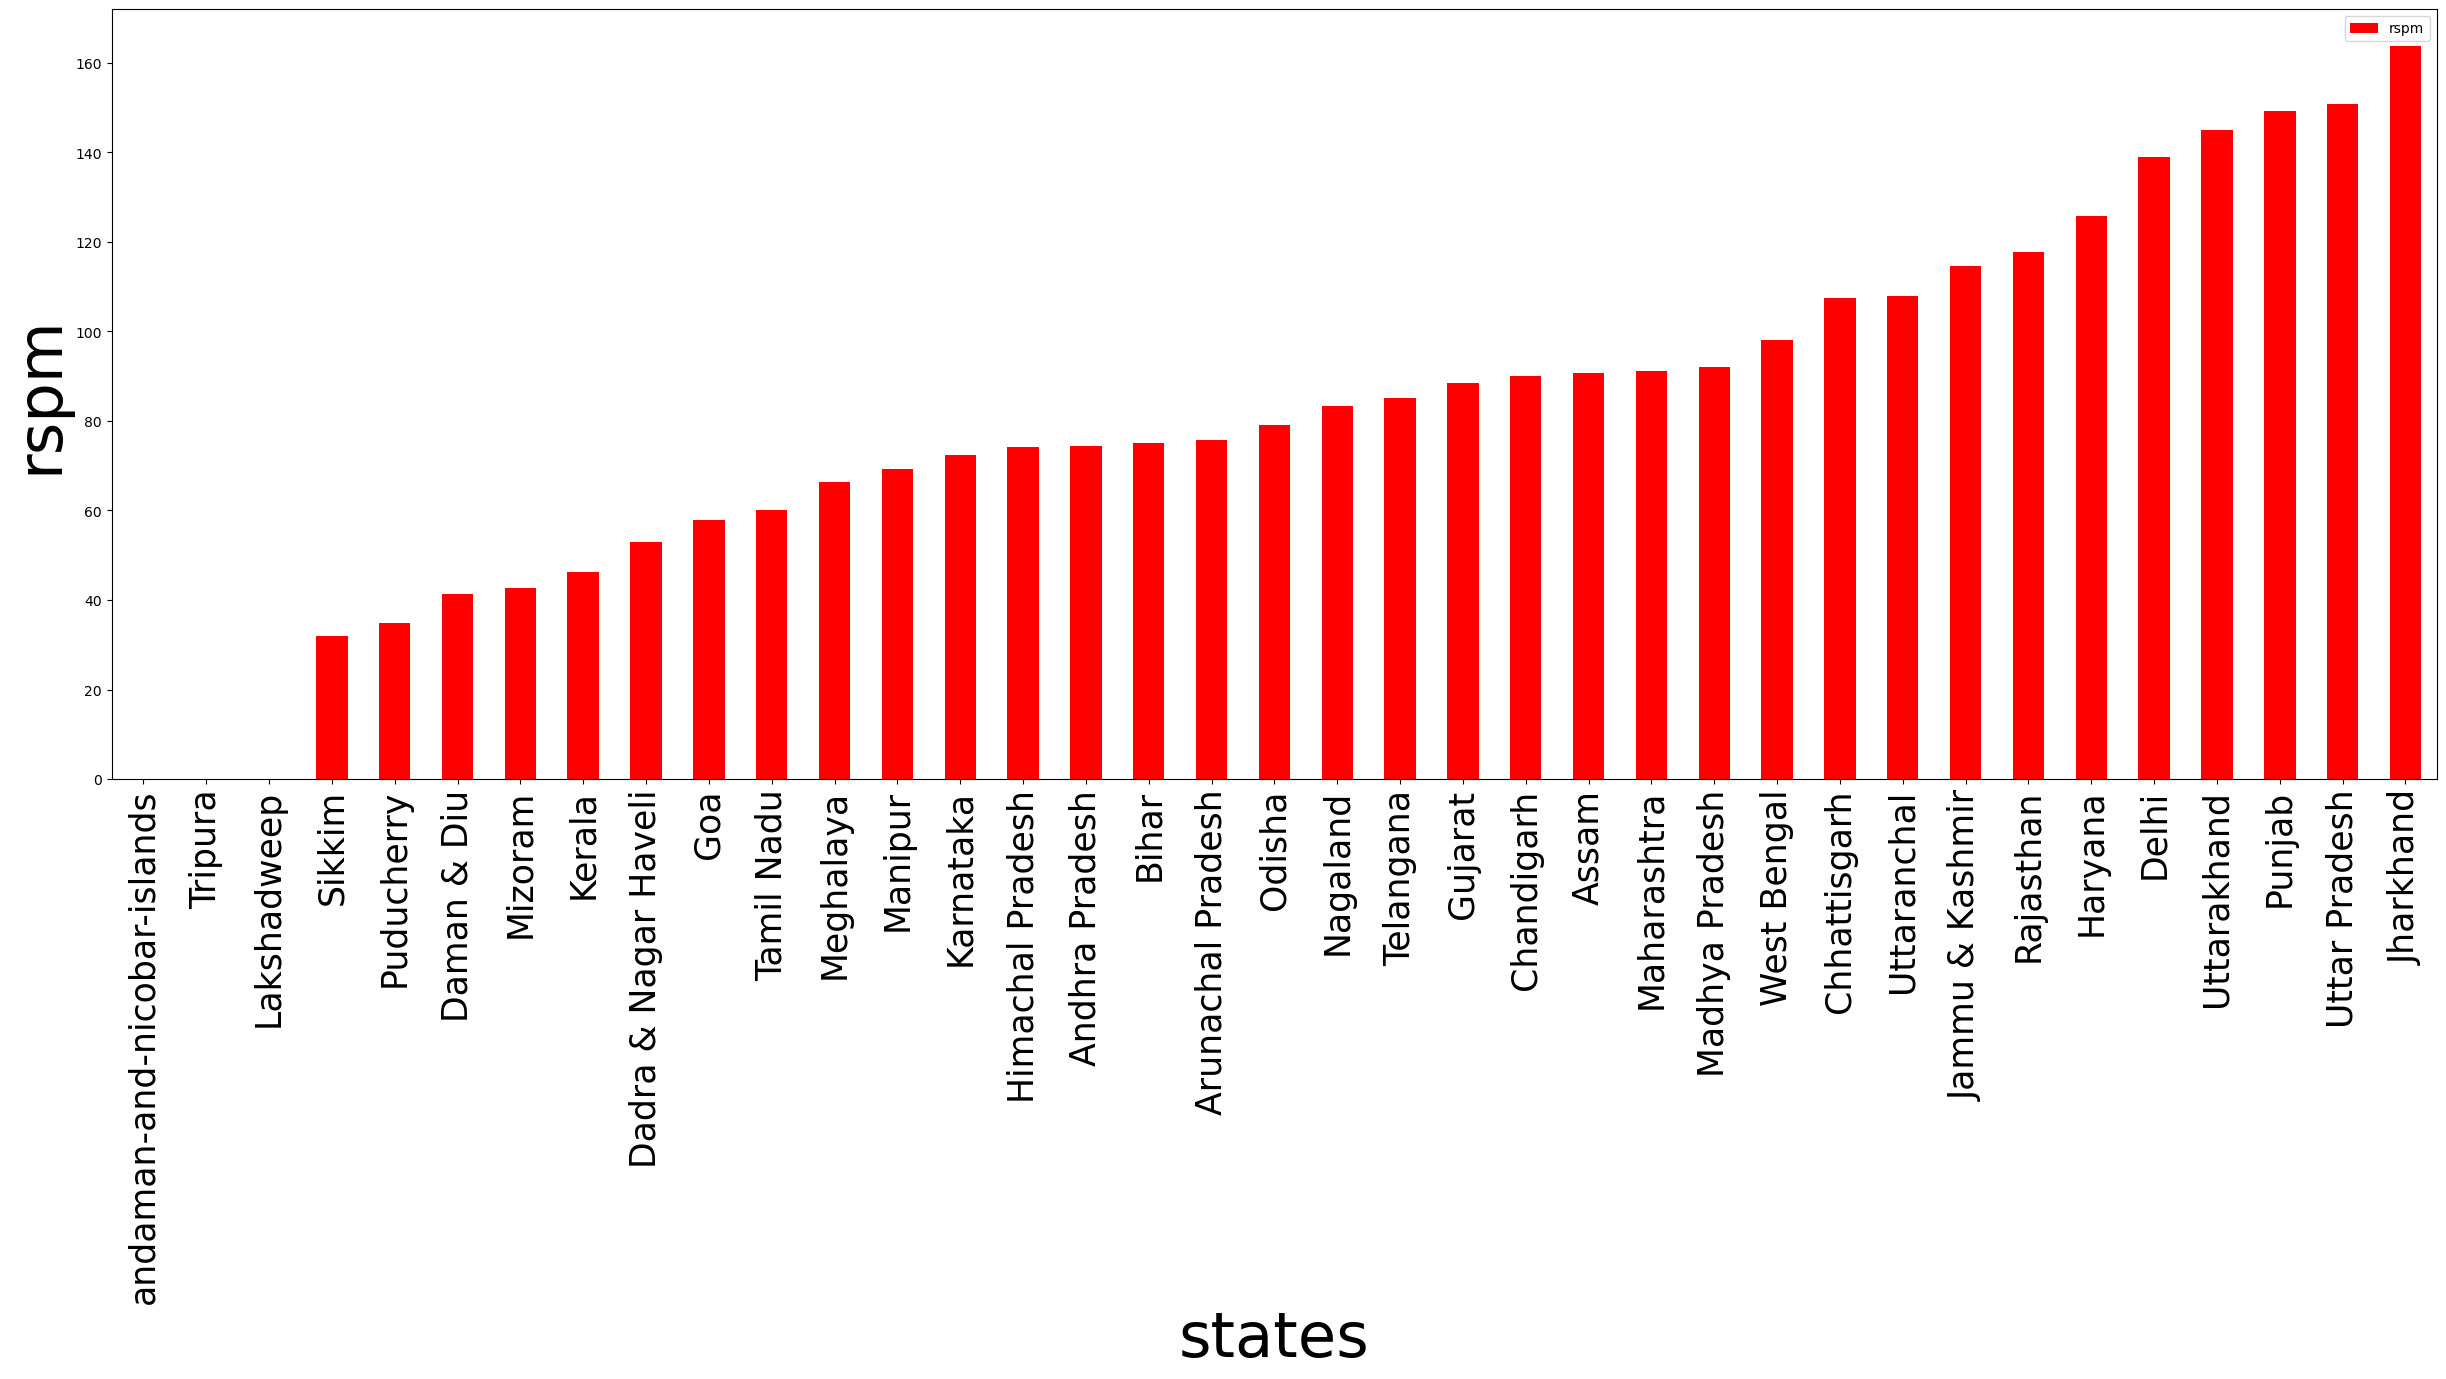

In [23]:
df2[['rspm','state']].groupby('state').mean().sort_values(by = 'rspm').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('rspm',fontsize = 45)
plt.show()

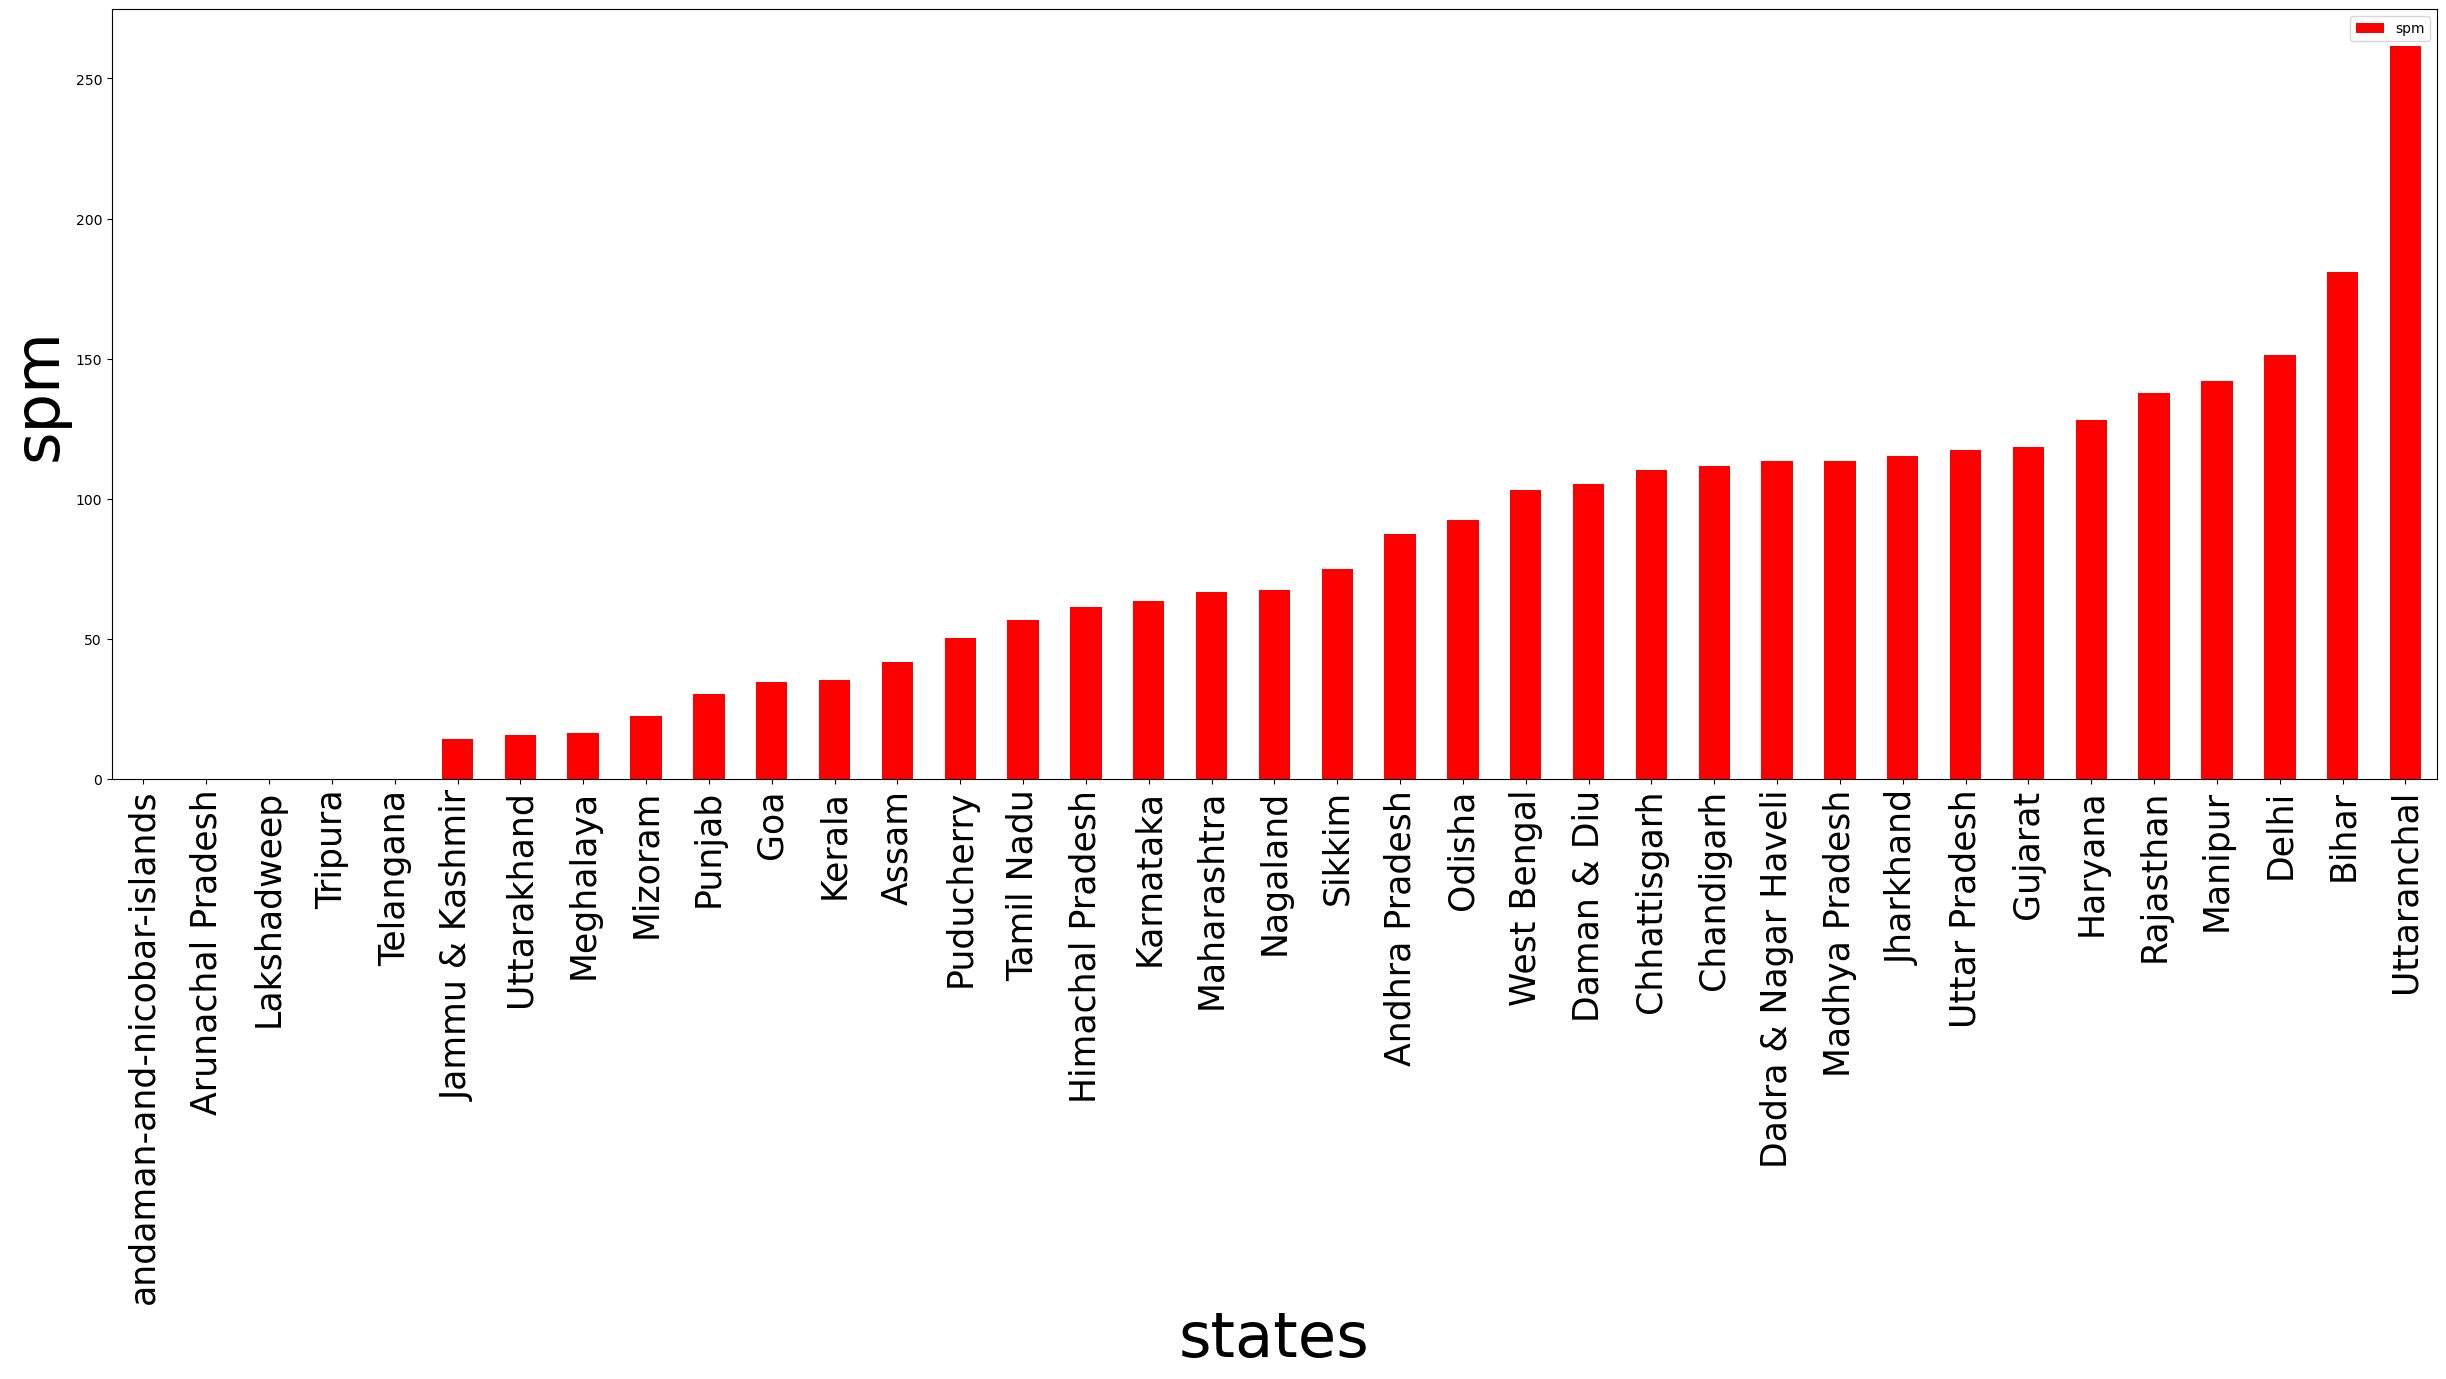

In [24]:
df2[['spm','state']].groupby('state').mean().sort_values(by = 'spm').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('spm',fontsize = 45)
plt.show()

# DATA PREPROCESSING

#USING NATIONAL STANDARD AQI-FORMULA TO FIND INDEPENDEN VALUE

In [26]:
def cal_soi(so2):
    si = 0
    if (so2<=40):
        si = so2*(50/40)
    elif(so2>40 and so2<=80):
        si = 50 + (so2-40) * (50/40)
    elif(so2>80 and so2<=380):
        si = 100 + (so2-80) * (100/300)
    elif(so2>380 and so2<=800):
        si = 200 + (so2-380) * (100/420)
    elif(so2>800 and so2<=1600):
        si = 300+ (so2 - 800) * (100/800)
    return si
df2['soi'] = df2['so2'].apply(cal_soi)
df2[['soi','so2']].head()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\261854881.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['soi'] = df2['so2'].apply(cal_soi)


,soi,so2
0,6.000,4.8
1,3.875,3.1
2,7.750,6.2
3,7.875,6.3
4,5.875,4.7


In [27]:
def cal_noi(no2):
    ni = 0
    if (no2<=40):
        ni = no2*(50/40)
    elif(no2>40 and no2<=80):
        ni = 50 + (no2-40) * (50/40)
    elif(no2>80 and no2<=180):
        ni = 100 + (no2-80) * (100/100)
    elif(no2>180 and no2<=280):
        ni = 200 + (no2-180) * (100/100)
    elif(no2>280 and no2<=400):
        ni = 300+ (no2 - 280) * (100/120)
    else:
        ni = 400+ (no2 - 400) * (100/120)
    return ni
df2['noi'] = df2['no2'].apply(cal_noi)
df2[['noi','no2']].head()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\2239628449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['noi'] = df2['no2'].apply(cal_noi)


,noi,no2
0,21.750,17.4
1,8.750,7.0
2,35.625,28.5
3,18.375,14.7
4,9.375,7.5


In [28]:
def cal_roi(rspm):
    rpi = 0
    if (rspm<=30):
        rpi = rspm*(50/30)
    elif(rspm>30 and rspm<=60):
        rpi = 50 + (rspm-30) * (50/30)
    elif(rspm>60 and rspm<=90):
        rpi = 100 + (rspm-60) * (100/30)
    elif(rspm>90 and rspm<=120):
        rpi = 200 + (rspm-90) * (100/30)
    elif(rspm>120 and rspm<=250):
        rpi = 300+ (rspm - 120) * (100/130)
    else:
        rpi = 400+ (rspm - 250) * (100/130)
    return rpi
df2['roi'] = df2['rspm'].apply(cal_roi)
df2[['roi','rspm']].head()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\1444691268.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['roi'] = df2['rspm'].apply(cal_roi)


,roi,rspm
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [29]:
def cal_spmi(spm):
    spi = 0
    if (spm<=50):
        spi = spm*(50/50)
    elif(spm>50 and spm<=100):
        spi = 50 + (spm-50) * (50/50)
    elif(spm>100 and spm<=250):
        spi = 100 + (spm-100) * (100/150)
    elif(spm>250 and spm<=350):
        spi = 200 + (spm-250) * (100/100)
    elif(spm>350 and spm<=430):
        spi = 400+ (spm - 430) * (100/430)
    return spi
df2['spmi'] = df2['spm'].apply(cal_spmi)
df2[['spmi','spm']].head()

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\4260144542.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['spmi'] = df2['spm'].apply(cal_spmi)


,spmi,spm
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [30]:
def cal_aqi(si,ni,rpi,spmi):
    aqi = 0
    if (si>ni and si>rpi and si>spmi):
        aqi = si
    elif(ni>si and ni>rpi and ni>spmi):
        aqi = ni
    elif(rpi>si and rpi>ni and rpi>spmi):
        aqi = rpi
    elif(spmi>si and spmi>ni and spmi>rpi):
        aqi = spmi
    return aqi
df2 = df2.assign(aqi=df2.apply(lambda x: cal_aqi(x['soi'], x['noi'], x['roi'], x['spmi']), axis=1))
df3 = df2[['state','soi','noi','roi','spmi','aqi']]
df3.head()

,state,soi,noi,roi,spmi,aqi
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [32]:
df3.columns

Index(['state', 'soi', 'noi', 'roi', 'spmi', 'aqi'], dtype='object')

In [33]:
x = df3[['soi','noi','roi','spmi']]
y = df3['aqi']

# TRAINING AND FITTING THE DATA

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)

In [35]:
x_train.shape

(333640, 4)

In [36]:
x_test.shape

(83410, 4)

# GRIDSEARCHCV FOR BEST HYPERPARAMETER ,MODEL

In [37]:
linear = LinearRegression()
logistic = LogisticRegression()
random = RandomForestRegressor()
decision = DecisionTreeRegressor()

In [38]:
lr_param = {'fit_intercept':[5,10,15],'n_jobs':[5,10,15]}
rf_param = {'n_estimators':[5,10,15],'max_depth':[5,10,15]}
dt_param = {'max_depth':[10,20,30],'max_features':[5,10,15]}

In [39]:
lr_grid = GridSearchCV(linear,lr_param,cv=5 )
rf_grid = GridSearchCV(random,rf_param,cv=5)
dt_grid = GridSearchCV(decision,dt_param,cv=5)

In [40]:
 dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [5, 10, 15]})

In [41]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15], 'n_estimators': [5, 10, 15]})

In [42]:
lr_grid.fit(x_train,y_train)

C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: Fu

C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\mrsha\anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: Fu

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [5, 10, 15], 'n_jobs': [5, 10, 15]})

# EVALUATING ACCURACY FOR THE RESPECTIVE MODEL

In [43]:
print('DECISION TREE =',dt_grid.score(x_test,y_test))
print('RANDOM FOREST =',rf_grid.score(x_test,y_test))
print('LINEAR REGRESSION =',lr_grid.score(x_test,y_test))

DECISION TREE = 0.9993367314040926
RANDOM FOREST = 0.9993751474086562
LINEAR REGRESSION = 0.8834931642307969


In [44]:
dt_grid.predict([[6.000,8.750,0.0,0.0]])

C:\Users\mrsha\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.24324438])

In [45]:
y_pred = dt_grid.predict(x_test)

C:\Users\mrsha\AppData\Local\Temp\ipykernel_1492\3275811121.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(y_test, y_pred, cmap='cividis', color='red')


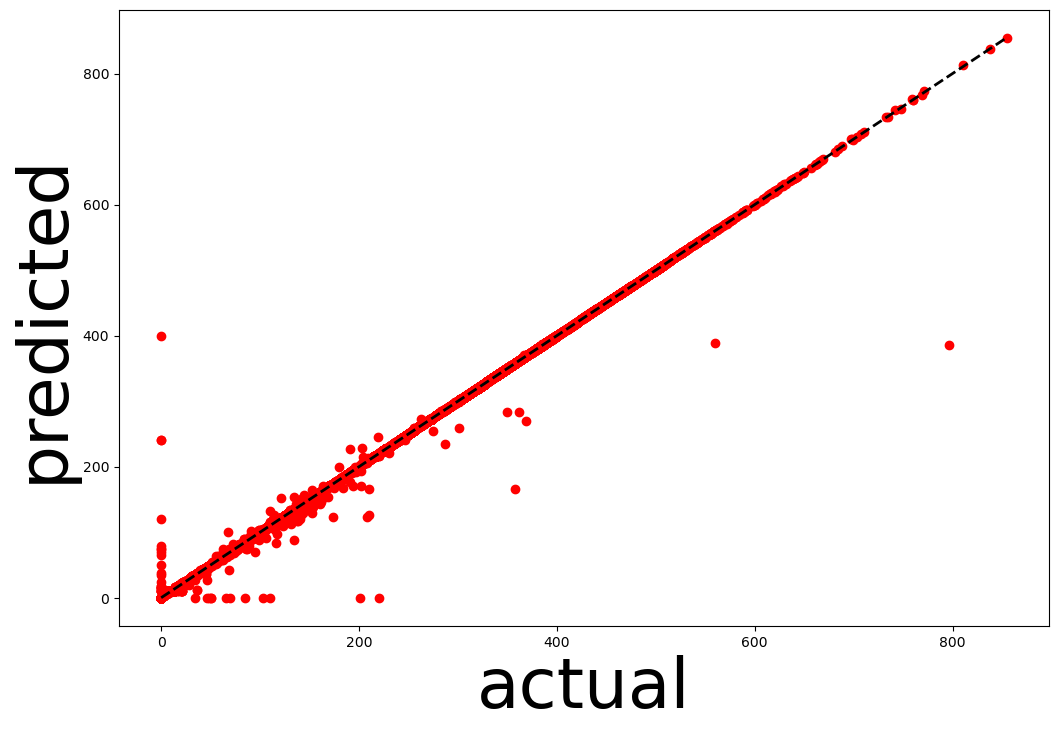

In [46]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Create a scatter plot of the actual vs predicted values
ax.scatter(y_test, y_pred, cmap='cividis', color='red')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set the axis labels
ax.set_xlabel('actual',fontsize = 50)
ax.set_ylabel('predicted',fontsize = 50)

# Show the plot
plt.show()

In [47]:
x_train.head(2)

,soi,noi,roi,spmi
228729,26.25,58.75,309.230769,0.0
227812,15.00,52.50,106.666667,0.0


In [48]:
import joblib

In [49]:
joblib.dump(dt_grid,'air_quality_model.joblib')

['air_quality_model.joblib']

In [50]:
import os

print(os.getcwd())

C:\Users\mrsha
